In [11]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


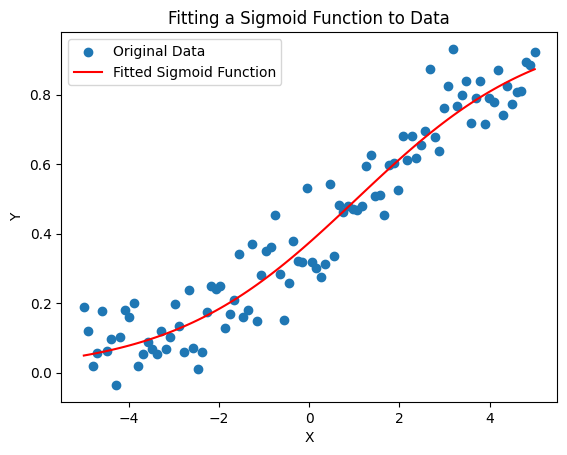

Parameters of the fitted sigmoid function: [0.48913488 1.049684  ]


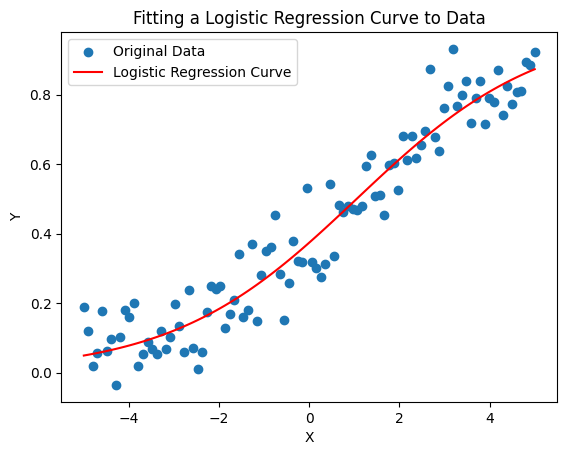

Mean Absolute Error (MAE): 0.24454454481699742
Mean Squared Error (MSE): 0.07977323824224031
Root Mean Squared Error (RMSE): 0.2824415660667535
R-squared (R^2): -0.01196415934643058


In [9]:
def sigmoid(x, s, c):
    return 1 / (1 + np.exp(-s * (x - c)))

# Generate sample data
x_data = np.linspace(-5, 5, 100)
y_data = 1 / (1 + np.exp(-0.5 * (x_data - 1))) + np.random.normal(0, 0.1, 100)  # Sample data with noise

# Fit the sigmoid function to the data
params, covariance = curve_fit(sigmoid, x_data, y_data, bounds=([0, 0], [np.inf, np.inf]))

# Plot the original data and the fitted sigmoid function
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, sigmoid(x_data, *params), color='red', label='Fitted Sigmoid Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Sigmoid Function to Data')
plt.legend()
plt.show()

print("Parameters of the fitted sigmoid function:", params)

class CustomLogisticRegression:
    def __init__(self, params):
        self.params = params

    def predict_proba(self, X):
        return sigmoid(X, *self.params)

logistic_reg = CustomLogisticRegression(params)
y_pred_proba = logistic_reg.predict_proba(x_data)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_proba]

# Plot the original data and the logistic regression curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_pred_proba, color='red', label='Logistic Regression Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Logistic Regression Curve to Data')
plt.legend()
plt.show()

mae = mean_absolute_error(y_data, y_pred)
mse = mean_squared_error(y_data, y_pred)
rmse = mean_squared_error(y_data, y_pred, squared=False)  # Pass squared=False to get RMSE directly
r2 = r2_score(y_data, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x_data and y_data are your input features and target labels
# x_data and y_data should be 1D arrays or column vectors

# Create a logistic regression model
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(x_data.reshape(-1, 1), y_data)

# Predict probabilities of class 1 for each sample in x_data
# This will return a probability between 0 and 1 for each sample
y_pred_proba = logistic_reg.predict_proba(x_data.reshape(-1, 1))[:, 1]

# Convert predicted probabilities to binary predictions based on a threshold
# For example, if the predicted probability is greater than 0.5, classify as 1, otherwise 0
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_data, y_pred)
print("Accuracy:", accuracy)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [1]:
import numpy as np

array = np.array([[1, 2, 3],
                  [4, 5, 6]])

array.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [4]:

import decimal as d
def highPrecisionArray(numOfSamples, beg=0, last=1, precision = 4):
    d.getcontext().prec = precision
    start = d.Decimal(beg)
    end = d.Decimal(last)
    step = (end - start) / d.Decimal(numOfSamples - 1)
    numArray = [start + i * step for i in range(numOfSamples)]
    numArray = [float(x) for x in numArray]
    return numArray

array = highPrecisionArray(21)

print(array)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
